In [52]:
import plotly.express as px
import seaborn as sns
import matplotlib. pyplot as plt
import pandas as pd
import numpy as np

In [53]:
health_care_base = pd.read_csv('health_care.csv')
health_care_base

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [54]:
x_health_care = health_care_base.iloc[:,0].values
x_health_care

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [55]:
y_health_care = health_care_base.iloc[:,-1].values
y_health_care

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [56]:
np.corrcoef(x_health_care, y_health_care)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [57]:
#vector shape
x_health_care.shape

(10,)

In [58]:
#matriz shape
x_health_care = x_health_care.reshape(-1,1)
x_health_care

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [59]:
# y_health_care = y_health_care.reshape(-1, 1)
# y_health_care

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
health_care_regressor = LinearRegression()
(health_care_regressor.fit(x_health_care,y_health_care))

LinearRegression()

b0

In [62]:
health_care_regressor.intercept_

-558.9490909090912

b1

In [63]:
health_care_regressor.coef_

array([61.86787879])

In [64]:
predict = health_care_regressor.predict(x_health_care)

In [65]:
grath = px.scatter(x = x_health_care.ravel(), y = y_health_care.ravel())
grath.add_scatter(x = x_health_care.ravel(), y = predict, name = 'Regression')
grath.show()


###  y = -558.94 + 61.86 * x

In [68]:
y = health_care_regressor.intercept_ + health_care_regressor.coef_ * 40
y

array([1915.76606061])

In [69]:
health_care_regressor.predict([[40]])

array([1915.76606061])

In [70]:
health_care_regressor.score(x_health_care, y_health_care)

0.8666112727879174

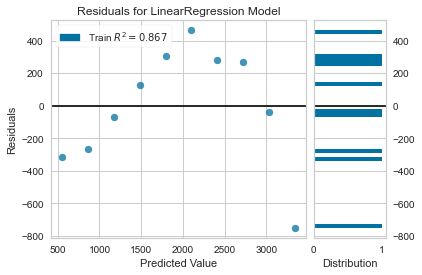

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [74]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(health_care_regressor)
visualizer.fit(x_health_care, y_health_care)
visualizer.poof()